# Projet : Algorithme Génétique pour l'Optimisation des Ventes
## Introduction

Ce projet utilise un algorithme génétique pour optimiser le budget publicitaire afin de maximiser les ventes d'un magasin. Les données contiennent des informations sur les produits, les quantités vendues, le prix unitaire, le coût, les avis clients, et le budget publicitaire.

In [ ]:
# Importation des librairies nécessaires
import pandas as pd  # Manipulation des données (tables et DataFrame)
import numpy as np  # Calculs numériques (tableaux et opérations mathématiques)
import matplotlib.pyplot as plt  # Visualisation des données (graphiques)
import seaborn as sns  # Visualisation avancée et esthétique des données
from sklearn.preprocessing import LabelEncoder  # Encodage des variables catégorielles
from sklearn.linear_model import LinearRegression  # Modèle de régression linéaire
from sklearn.model_selection import train_test_split  # Division des données en ensembles d'entraînement et de test
from sklearn.metrics import mean_squared_error, r2_score  # Métriques pour évaluer la performance du modèle

# Chargement du fichier CSV contenant les données de vente
# 'df' est notre DataFrame qui contient l'ensemble des données
df = pd.read_csv("./sales_data_simplified.csv")

# Affichage des 5 premières lignes du DataFrame pour avoir un aperçu des données
df.head()

,Date,Produit,Quantité,Prix Unitaire (€),Coût Unitaire (€),Avis Client,Publicité (€),Vente Totale (€)
0,2024-01-01,0,49,126.187605,51.789526,1.2,286.960310,6183.192648
1,2024-01-02,1,49,25.502894,11.293114,1.1,410.337397,1249.641820
2,2024-01-03,0,12,10.985124,139.073283,3.8,490.519146,131.821487
3,2024-01-04,0,39,129.299939,138.271779,5.0,427.904987,5042.697615
4,2024-01-05,1,2,46.912051,41.683574,4.6,440.147192,93.824102


## Analyse Exploratoire des Données

In [8]:

# Afficher des statistiques descriptives
df.describe()


,Produit,Quantité,Prix Unitaire (€),Coût Unitaire (€),Avis Client,Publicité (€),Vente Totale (€)
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.940000,26.45500,105.603292,74.840905,3.044000,286.702990,2868.192644
std,0.818382,14.32354,54.919081,40.998973,1.107927,127.830140,2253.219626
min,0.000000,1.00000,10.985124,5.376279,1.000000,50.106886,32.831283
25%,0.000000,16.75000,57.536600,41.202167,2.175000,199.803609,817.858255
50%,1.000000,28.00000,106.364775,74.630164,3.100000,290.449990,2619.049143
75%,2.000000,37.00000,150.173233,110.297534,4.000000,391.348972,4601.816140
max,2.000000,49.00000,199.226936,149.395549,5.000000,499.709075,8744.405657


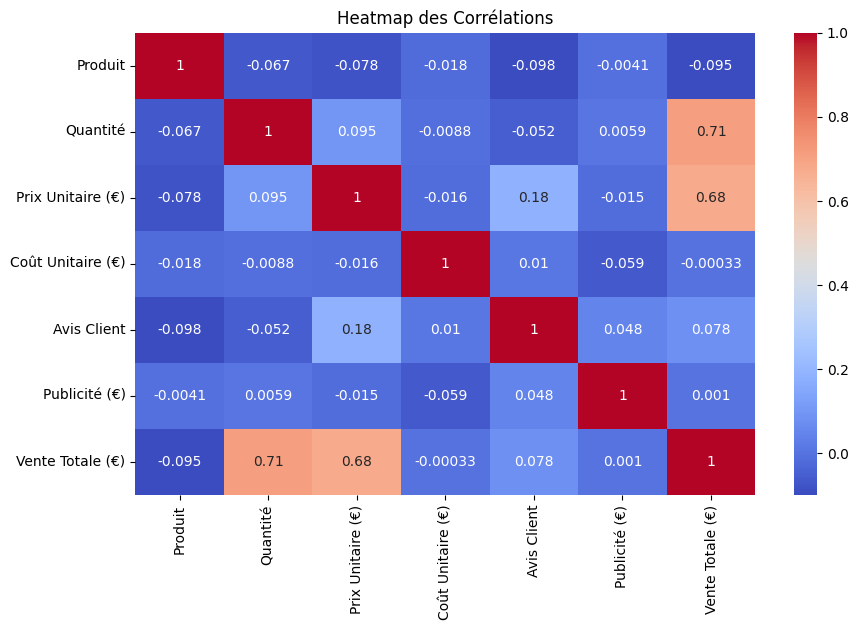

In [9]:

# Afficher une heatmap des corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap des Corrélations")
plt.show()


## Préparation des Données

In [14]:

# Encodage de la colonne 'Produit'
le = LabelEncoder()
df['Produit'] = le.fit_transform(df['Produit'])

# Définir les variables X et y
X = df[['Quantité', 'Prix Unitaire (€)', 'Coût Unitaire (€)', 'Avis Client', 'Publicité (€)']]
y = df['Vente Totale (€)']

# Split des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modélisation avec Régression Linéaire

In [11]:

# Création du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")


Mean Squared Error (MSE) : 772810.43
Coefficient de détermination (R²) : 0.87


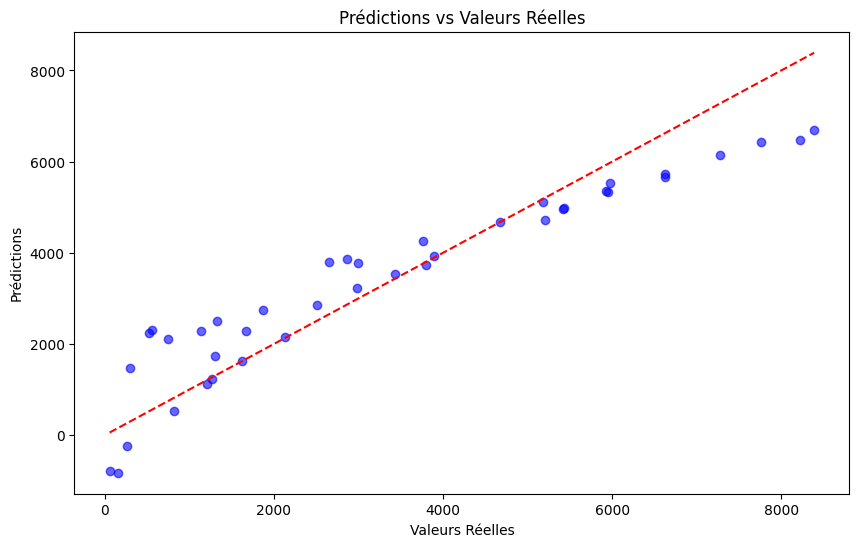

In [ ]:

# Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Prédictions vs Valeurs Réelles")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.show()


## Implémentation de l'Algorithme Génétique

Génération 0, Meilleure fitness : 574764.0138943917
Génération 10, Meilleure fitness : 575651.3442769449
Génération 20, Meilleure fitness : 576205.6181232857
Génération 30, Meilleure fitness : 576517.7053825723
Génération 40, Meilleure fitness : 576849.4519957168
Génération 50, Meilleure fitness : 576945.7317669875
Génération 60, Meilleure fitness : 577298.9558009511
Génération 70, Meilleure fitness : 577320.0910692624
Génération 80, Meilleure fitness : 577399.2700085364
Génération 90, Meilleure fitness : 577444.6331146909
Génération 100, Meilleure fitness : 577501.1775380005
Génération 110, Meilleure fitness : 577697.7134539706
Génération 120, Meilleure fitness : 577751.0065882299
Génération 130, Meilleure fitness : 577849.0287479189
Génération 140, Meilleure fitness : 577849.0287479189
Génération 150, Meilleure fitness : 577849.0287479189
Génération 160, Meilleure fitness : 577849.0287479189
Génération 170, Meilleure fitness : 577864.3073662645
Génération 180, Meilleure fitness : 577

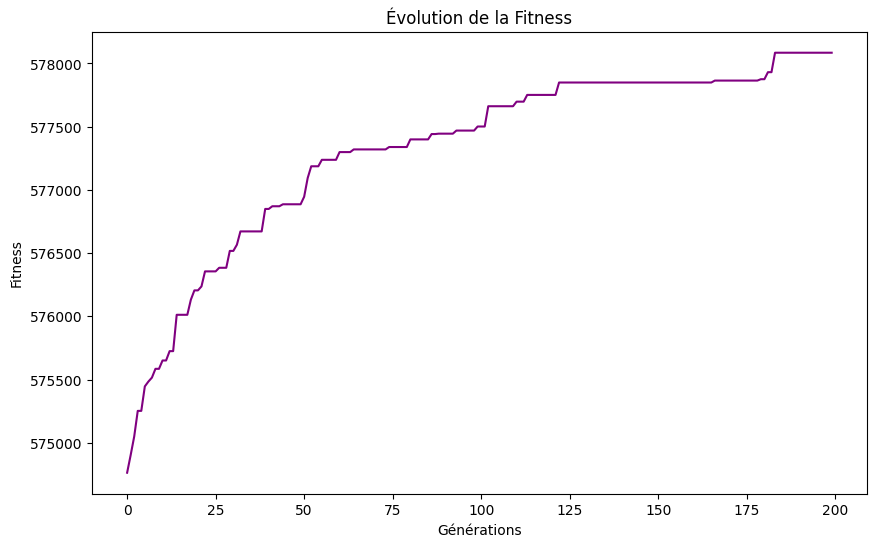

Meilleure solution trouvée : [390.55943617184266 377.0164684728682 498.3753721371334 176.50227957002335
 485.41921150571454 408.4664349651789 447.32904490929184 169.933015345457
 495.69854230554364 365.80940294782437 426.2044660477339
 482.68546174221547 480.00652889335635 470.4976176878349 425.5155417552912
 90.1208987695756 415.49099715361496 485.0172767859907 213.85928662412846
 263.6446666497624 488.9041117479457 232.2619618593183 316.0348066266413
 463.3323606517488 480.17558784125714 449.51792288743934
 130.67626010961655 272.0671089371444 484.39103128641216
 343.27823973466604 364.7734803436795 390.40796333009513 476.3672207822357
 494.58423657798573 454.9821414912835 238.97170124832144
 474.70311980138064 459.4353655521451 158.01041048122022 481.6286626488965
 328.8977913018878 447.9748716095481 446.58409852755756 489.2805195622289
 324.8354427943432 389.74153348026226 476.77751948691593 463.7466337377904
 493.39389909326246 439.95224812148183 347.0906637119861
 213.58233208931

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Fonction de crossover (croisement)
def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    child = np.concatenate([parent1[:point], parent2[point:]])
    return child

# Fonction de mutation
def mutate(chromosome, mutation_rate=0.1):
    chromosome = np.array(chromosome)
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = np.random.uniform(50, 500)
    return chromosome

# Réinitialiser un chromosome aléatoirement
def random_reset(chromosome):
    return np.random.uniform(50, 500, len(chromosome))

# Algorithme génétique
def genetic_algorithm(pop_size, generations):
    population = initialize_population(pop_size)
    best_fitness = []
    best_chromosome = None

    for generation in range(generations):
        # Trier la population par fitness (meilleure en premier)
        population = sorted(population, key=fitness, reverse=True)
        current_best_fitness = fitness(population[0])
        best_fitness.append(current_best_fitness)

        # Afficher la meilleure fitness à chaque génération
        if generation % 10 == 0:
            print(f"Génération {generation}, Meilleure fitness : {current_best_fitness}")

        # Sauvegarder le meilleur chromosome (élitisme)
        if best_chromosome is None or current_best_fitness > fitness(best_chromosome):
            best_chromosome = population[0]

        # Vérifier la convergence (tous les chromosomes identiques)
        if all(np.array_equal(population[0], chromosome) for chromosome in population):
            print("Convergence détectée, réinitialisation partielle de la population.")
            population = [random_reset(chromosome) for chromosome in population[:pop_size // 2]] + population[pop_size // 2:]

        # Sélectionner la moitié supérieure de la population
        population = population[:pop_size // 2]

        # Générer une nouvelle population par crossover et mutation
        new_population = []
        for _ in range(pop_size // 2):
            population_array = np.array([np.array(chromosome) for chromosome in population], dtype=object)
            parents = random.sample(list(population_array), 2)
            child = crossover(parents[0], parents[1])
            child = mutate(child)
            new_population.append(child)

        # Ajouter la nouvelle population
        population += new_population

    # Visualisation de l'évolution de la fitness
    plt.figure(figsize=(10, 6))
    plt.plot(best_fitness, color='purple')
    plt.title("Évolution de la Fitness")
    plt.xlabel("Générations")
    plt.ylabel("Fitness")
    plt.show()

    # Retourner le meilleur chromosome trouvé
    return best_chromosome

# Exécuter l'algorithme génétique
best_solution = genetic_algorithm(pop_size=50, generations=200)
print("Meilleure solution trouvée :", best_solution)
